# 逻辑回归
依赖测试数据集: tesSet.txt horseColicTest.txt horseColicTraining.txt

如何实时展示matplot的图?
在conda的提示行中, 输入
```
ipython profile create
```
然后在对应的文件:C:\Users\gaoxi\.ipython\profile_default\ipython_config.py 中加入如下行即可:

```
c.InteractiveShellApp.matplotlib = 'inline'
```
及时生效

# 什么是逻辑回归
logistic函数实际上一种特殊的函数

$g(z)=1/(1 + e^{-z})$


函数图像是:

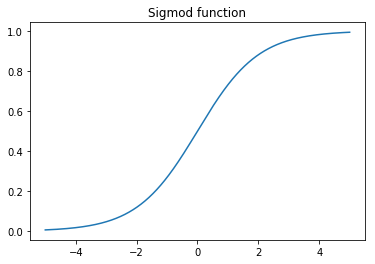

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-5,5,1000) # -5 到5 之间生成1000个数
y=[1/(1+np.exp(-i)) for i in x] 
plt.plot(x,y)

plt.title("Sigmod function")
plt.show()

那么对于线性分割情况:
$$h_\theta(x)=g(\theta^Tx)=\cfrac{1}{(1+e^{-\theta^Tx})}$$


那么对应着取1的概率:
$$P(y=1|x;\theta)=h_\theta(x)$$
$$P(y=0|x;\theta)=1-h_\theta(x)$$

实际上这个可以整合为一个公式:
$$P(y|x;\theta) = (h_\theta(x))^y(1-h_\theta(x))^{(1-y)}$$


如果我们希望我们的h对于数据D(N个数据)中的每个数据都对的话, 那么只需要
$$L(\theta)=P(x^{(1)}) * P(x^{(2)} .... * P(x^{{N}}))$$

这个结果最大化即可. 取其对数似然函数:
$$l(\theta)=\sum_{i=0}^{n}(y^{(i)}*h_\theta(x^{(i)}) + (1-y^{(i)})log(1-h_\theta(x^{(i)})))$$


显然的我们可以求这个函数的最大值(也就是**梯度上升法**):

对上式求导:
$$\theta_j:=\theta_j + a\sum_{i=1}^{n}(y^{(i)} - h_\theta(x^{(i)}))x_j^{(i)}$$


何为梯度下降:
如果上式最大, 可以同等的使下面的最小:
$$J(\theta)=-\cfrac{1}{N}l(\theta)$$

那么
$$\theta_j := \theta_j - a\cfrac{\partial}{\partial\theta_j}J(\theta)$$


对theta 求导可以得到:
$$\frac{\partial}{\partial\theta_j}J(\theta)=\frac{1}{N}\sum_{i=1}^{N}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$$


In [2]:
from numpy import *

# 读取所有示例数据
# 假设有两个标签X1, X2的数据 加上X0 = 1.0
def loadDataSet():
    dataMat = []
    labelMat = []
    with open("testSet.txt") as f:
        for line in f.readlines():
            lineArr = line.strip().split()
            # 每一行是:
            # X1, X2 -> Y / Label (0/1)
            # -0.017612	14.053064	0
            dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
            labelMat.append(int(lineArr[2]))
    # dataMat 是100 * 3
    # labelMat 是 1* 100
    return dataMat, labelMat


def sigmoid(inX):
    return 1.0/(1 + exp(-inX))

def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)
    
    # 100 * 1
    labelMatrix = mat(classLabels).transpose()
    m,n = shape(dataMatrix)
    # m = 100 n =3
    print("data matrix m =", m, ",n=", n)
    alpha = 0.001
    maxCycles = 500
    # 3 * 1
    weights = ones((n,1))
    print(shape(weights), "  shape label Matrix=", shape(labelMatrix))
    for k in range(maxCycles):
        
        # 100*3  *  3 * 1
        h = sigmoid(dataMatrix*weights)
        # h 是100*1, error is  100*1
        error = (labelMatrix - h)
                                    # 3*100 * 100*1  = 3 * 1
        weights = weights + alpha * dataMatrix.transpose()*error
        #print(shape(weights))
        #print("after k=", k, " error=", error)
    return weights
    

In [3]:
dataArr, labelMat = loadDataSet()
weights = gradAscent(dataArr, labelMat)
print("weights", weights)


data matrix m = 100 ,n= 3
(3, 1)   shape label Matrix= (100, 1)
weights [[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


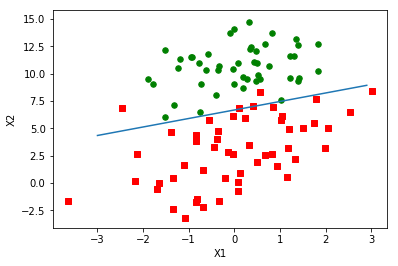

In [4]:
# import matplotlib.pyplot as plt
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat,labelMat=loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0] 
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()
    
plotBestFit(weights.getA())
    

上面实现过程中, 其实采用的是 最大化score也就是z=w*X来得到最逼近y的结果. 所以是梯度上升
那么实际上我们也可以采用梯度下降的方法来最小化错误函数来达到同样的目的.

那么实现就是这样了.



data matrix m = 100 ,n= 3
(3, 1)   shape label Matrix= (100, 1)
weights [[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


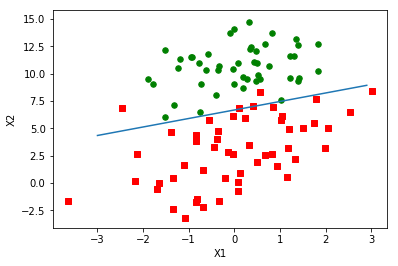

In [5]:

def gradecent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)
    
    # 100 * 1
    labelMatrix = mat(classLabels).transpose()
    m,n = shape(dataMatrix)
    # m = 100 n =3
    print("data matrix m =", m, ",n=", n)
    alpha = 0.001
    maxCycles = 500
    # 3 * 1
    weights = ones((n,1))
    print(shape(weights), "  shape label Matrix=", shape(labelMatrix))
    for k in range(maxCycles):
        
        # 100*3  *  3 * 1
        h = sigmoid(dataMatrix*weights)
        # h 是100*1, error is  100*1
        error = (h - labelMatrix)
                                    # 3*100 * 100*1  = 3 * 1
        weights = weights - alpha * dataMatrix.transpose()*error
        #print(shape(weights))
        #print("after k=", k, " error=", error)
    return weights


dataArr, labelMat = loadDataSet()
weights = gradecent(dataArr, labelMat)
print("weights", weights)
plotBestFit(weights.getA())

## 随机梯度上升
上面的数据中每次都会遍历整个数据集, 效率太低
而随机梯度上升每次 只会遍历一个数据


weights [ 1.01702007  0.85914348 -0.36579921]


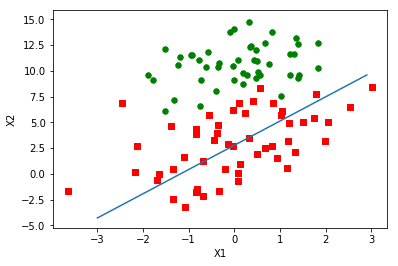

In [6]:
def stocGradAscent0(dataMatrix, classLabels):
    
    m,n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n, dtype=float64)
    # m个记录 n个特征
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
        
    return weights
        
dataArr, labelMat = loadDataSet()
weights = stocGradAscent0(array(dataArr), labelMat)
print("weights", weights)
plotBestFit(weights)

shape of dataMatrix[0] (3,)  shapof dataMatrix[0]*weights (3,)
weights for improved SGD [14.42333266  1.01180143 -1.80533855]


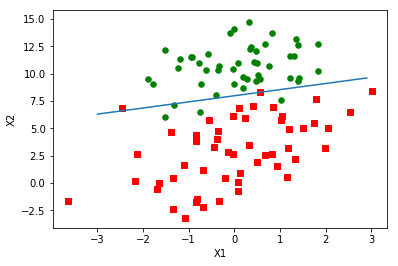

In [7]:
# 上面这个算法的效果不太好. 因为它只迭代了150次, 数据集的大小
# 我们可以来改进它.
def stocGradAscent1(dataMatrix, classLabels, numIter = 150):
    m,n = shape(dataMatrix)
    

    weights = ones(n)
    
    # 3*1  3*1
    print("shape of dataMatrix[0]", shape(dataMatrix[0]), " shapof dataMatrix[0]*weights", shape(dataMatrix[0]*weights))
    

    for j in range(numIter):
        dataIndex = range(m)
        for i in range(m):
            alpha = 4/(1.0 + j + i) + 0.01
            randIndex = int(random.uniform(0, len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex]* weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
           # del(dataIndex[randIndex])
    return weights
        
dataArr, labelMat = loadDataSet()
weights = stocGradAscent1(array(dataArr), labelMat)
print("weights for improved SGD", weights)
plotBestFit(weights)

## 预测病马死亡率
Chapter 05

In [8]:
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5:
        return 1.0
    else:
        return 0.0
    
def colicTest(iterCount=500):
    frTrain = open("horseColicTraining.txt", "r")
    frTest = open("horseColicTest.txt", "r")
    trainingSet = []
    trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split("\t")
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(array(trainingSet), trainingLabels, iterCount)
    errorCount =0
    numTestVec = 0
    for line in frTest.readlines():
        numTestVec+=1
        currLine = line.strip().split("\t")
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr), trainWeights)) != int(currLine[21]):
            errorCount+=1
    errorRate = (float(errorCount)/numTestVec)
    print("the error rate is", errorRate)
    return errorRate

def multiTest(numTests=10, iterCount=500):
    errorSum =0
    for k in range(numTests):
        errorSum+= colicTest(iterCount)
    print("After %d iter test, the average error is %f" % (numTests, errorSum/float(numTests)))
    return errorSum/float(numTests)
multiTest()

shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.31343283582089554
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.2835820895522388
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.3582089552238806
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.2835820895522388
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.26865671641791045
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.2835820895522388
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.23880597014925373
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.23880597014925373
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.31343283582089554
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error ra

0.2835820895522388

shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.23880597014925373
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.373134328358209
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.2835820895522388
After 3 iter test, the average error is 0.298507
already run in  200
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.34328358208955223
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.29850746268656714
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.582089552238806
After 3 iter test, the average error is 0.407960
already run in  205
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.2835820895522388
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.2537313432835821
shape of dataMatrix[0] (21,)  shapof dataMatr

the error rate is 0.26865671641791045
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.43283582089552236
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.26865671641791045
After 3 iter test, the average error is 0.323383
already run in  310
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.3582089552238806
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.2537313432835821
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.373134328358209
After 3 iter test, the average error is 0.328358
already run in  315
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.5074626865671642
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.26865671641791045
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.3582089552238806
After 

the error rate is 0.29850746268656714
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.3880597014925373
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.31343283582089554
After 3 iter test, the average error is 0.333333
already run in  420
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.29850746268656714
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.23880597014925373
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.29850746268656714
After 3 iter test, the average error is 0.278607
already run in  425
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.31343283582089554
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.31343283582089554
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.417910447761194
Aft

the error rate is 0.26865671641791045
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.26865671641791045
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.2835820895522388
After 3 iter test, the average error is 0.273632
already run in  530
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.26865671641791045
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.26865671641791045
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.26865671641791045
After 3 iter test, the average error is 0.268657
already run in  535
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.4626865671641791
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.26865671641791045
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.23880597014925373
Af

the error rate is 0.373134328358209
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.2835820895522388
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.3283582089552239
After 3 iter test, the average error is 0.328358
already run in  640
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.2537313432835821
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.6119402985074627
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.31343283582089554
After 3 iter test, the average error is 0.393035
already run in  645
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.43283582089552236
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.29850746268656714
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.29850746268656714
After 

the error rate is 0.44776119402985076
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.3582089552238806
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.40298507462686567
After 3 iter test, the average error is 0.402985
already run in  750
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.2835820895522388
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.29850746268656714
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.2835820895522388
After 3 iter test, the average error is 0.288557
already run in  755
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.3283582089552239
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.40298507462686567
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.3283582089552239
After

the error rate is 0.31343283582089554
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.4925373134328358
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.2835820895522388
After 3 iter test, the average error is 0.363184
already run in  860
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.34328358208955223
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.44776119402985076
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.3582089552238806
After 3 iter test, the average error is 0.383085
already run in  865
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.26865671641791045
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.2835820895522388
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.31343283582089554
Afte

the error rate is 0.5074626865671642
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.4626865671641791
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.43283582089552236
After 3 iter test, the average error is 0.467662
already run in  970
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.2835820895522388
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.3283582089552239
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.4925373134328358
After 3 iter test, the average error is 0.368159
already run in  975
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.6119402985074627
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.5074626865671642
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.373134328358209
After 3 i

the error rate is 0.6567164179104478
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.2537313432835821
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.29850746268656714
After 3 iter test, the average error is 0.402985
already run in  1080
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.34328358208955223
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.40298507462686567
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.373134328358209
After 3 iter test, the average error is 0.373134
already run in  1085
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.6119402985074627
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.2835820895522388
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.23880597014925373
Afte

the error rate is 0.2537313432835821
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.4925373134328358
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.4626865671641791
After 3 iter test, the average error is 0.402985
already run in  1190
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.2537313432835821
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.3582089552238806
shape of dataMatrix[0] (21,)  shapof dataMatrix[0]*weights (21,)
the error rate is 0.2537313432835821
After 3 iter test, the average error is 0.288557
already run in  1195


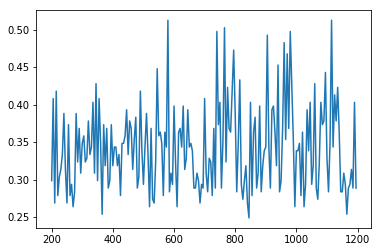

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# paint out a graph about the avg error rate and iterations 
x=[200 + i * 5 for i in range(200)]
y=[]
for i in x:
    y.append(multiTest(3, i))
    print("already run in ", i)
plt.plot(x,y)
plt.show()